In [31]:
from matplotlib import pyplot as plt
import pandas as pd

Non-oracle baseline 

In [ ]:
"""
Training:
python main.py \
  --datasource=sinusoid \
  --logdir=logs/sine_nonoracle/ \
  --pretrain_iterations=70000 \
  --metatrain_iterations=0 \
  --norm=None \
  --update_batch_size=10 \
  --train=True

  

Testing:
python main.py \
  --datasource=sinusoid \
  --logdir=logs/sine_nonoracle/ \
  --pretrain_iterations=70000 \
  --metatrain_iterations=0 \
  --norm=None \
  --update_batch_size=10 \
  --train=True
"""


'\nTraining:\npython main.py   --datasource=sinusoid   --logdir=logs/sine_nonoracle/   --pretrain_iterations=70000   --metatrain_iterations=0   --norm=None   --update_batch_size=10   --train=True\n\n  \n\nTesting:\npython main.py   --datasource=sinusoid   --logdir=logs/sine_nonoracle/   --pretrain_iterations=70000   --metatrain_iterations=0   --norm=None   --update_batch_size=10   --train=True\n\n\n\n\n'

In [33]:
# non oracle baseline 
baseline_results_csv = r"logs\sine\cls_5.mbs_25.ubs_10.numstep1.updatelr0.001nonorm\test_ubs10_stepsize0.001.csv"
baseline_df = pd.read_csv(baseline_results_csv)

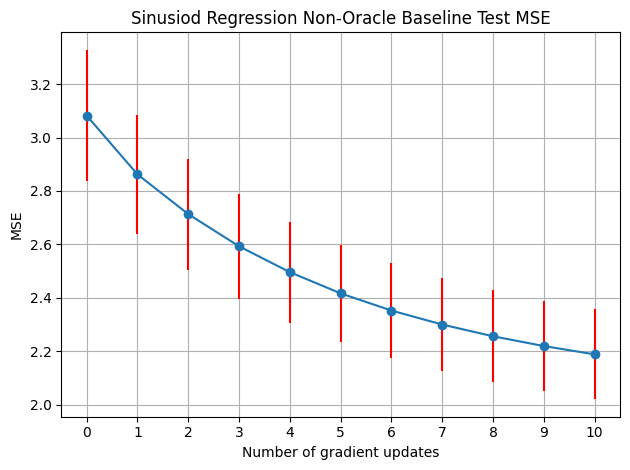

In [ ]:
# Performance of supervised non-oracle baseline 

steps = [int(i.replace("update", "")) for i in baseline_df.columns]
ci = baseline_df.iloc[2]
mean = baseline_df.iloc[0]
plt.figure()
plt.errorbar(steps, mean, yerr=ci, ecolor='red', fmt='-o')
plt.xlabel("Number of gradient updates")
plt.ylabel("MSE")
plt.title("Sinusoid Regression Non-Oracle Baseline Test MSE")
plt.xticks(steps)
plt.grid(True)
plt.tight_layout()
plt.show()



In [35]:
# As expected the MSE is decreasing with number of updates. Comparing with Will's plot we can see that MAML outperforms the pretrained baseline 

Oracle Baseline 

In [36]:
"""
Training:
python main.py \
  --datasource=sinusoid \
  --logdir=logs/sine_oracle/ \
  --pretrain_iterations=70000 \
  --metatrain_iterations=0 \
  --norm=None \
  --update_batch_size=10 \
  --baseline=oracle \
  --train=True

  
Testing:
python main.py \
  --datasource=sinusoid \
  --logdir=logs/sine_oracle/ \
  --pretrain_iterations=70000 \
  --metatrain_iterations=0 \
  --norm=None \
  --update_batch_size=10 \
  --baseline=oracle \
  --train=False \
  --test_set=True
"""


'\nTraining:\npython main.py   --datasource=sinusoid   --logdir=logs/sine_oracle/   --pretrain_iterations=70000   --metatrain_iterations=0   --norm=None   --update_batch_size=10   --baseline=oracle   --train=True\n\n  \nTesting:\npython main.py   --datasource=sinusoid   --logdir=logs/sine_oracle/   --pretrain_iterations=70000   --metatrain_iterations=0   --norm=None   --update_batch_size=10   --baseline=oracle   --train=False   --test_set=True\n'

In [37]:
# Let us check the performance of the oracle baseline
oracle_csv = r"logs\sine\cls_5.mbs_25.ubs_10.numstep1.updatelr0.001oraclenonorm\test_ubs10_stepsize0.001.csv"

oracle_df = pd.read_csv(oracle_csv)



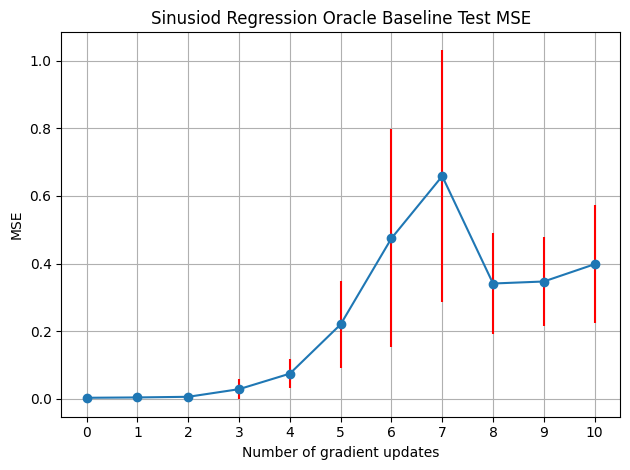

In [ ]:
# Performance of supervised oracle baseline 

steps = [int(i.replace("update", "")) for i in oracle_df.columns]
ci = oracle_df.iloc[2]
mean = oracle_df.iloc[0]
plt.figure()
plt.errorbar(steps, mean, yerr=ci, ecolor='red', fmt='-o')
plt.xlabel("Number of gradient updates")
plt.ylabel("MSE")
plt.title("Sinusoid Regression Oracle Baseline Test MSE")
plt.xticks(steps)
plt.grid(True)
plt.tight_layout()
plt.show()



In [39]:
# Very unexpected. As expected the MSE at update=0 is 0, which makse sense as the oracle baseline is given the amplitude and phase.
# We would however expect the plot to be a flat line at 0 for the other update steps as well, but we can see that our plot is spiking upwards
# which does not make sense as the MSE was 0 